In [3]:
#Q1 a
import pandas as pd
import zipfile
import os
import gdown
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

url = 'https://drive.google.com/uc?id=1LpH6AGIZn_h3eX_up_RwSC8Wc3BDTg2-'
output_zip = 'Asg 4_big mac data.zip'
gdown.download(url, output_zip, quiet=False)

# Extract ZIP file
extraction_path = 'bigmac'
with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Check the contents of the extraction path
extracted_files = os.listdir(extraction_path)
print("Extracted files:", extracted_files)

# Define the CSV file path
csv_file = os.path.join(extraction_path, 'big mac.csv')

bigmac = pd.read_csv(csv_file)

Downloading...
From: https://drive.google.com/uc?id=1LpH6AGIZn_h3eX_up_RwSC8Wc3BDTg2-
To: c:\Users\steve\OneDrive\Desktop\CUHK\Programming Techniques for Data Science (STAT5106)\assignment4\Asg 4_big mac data.zip
100%|██████████| 66.7k/66.7k [00:00<00:00, 16.7MB/s]

Extracted files: ['big mac.csv']


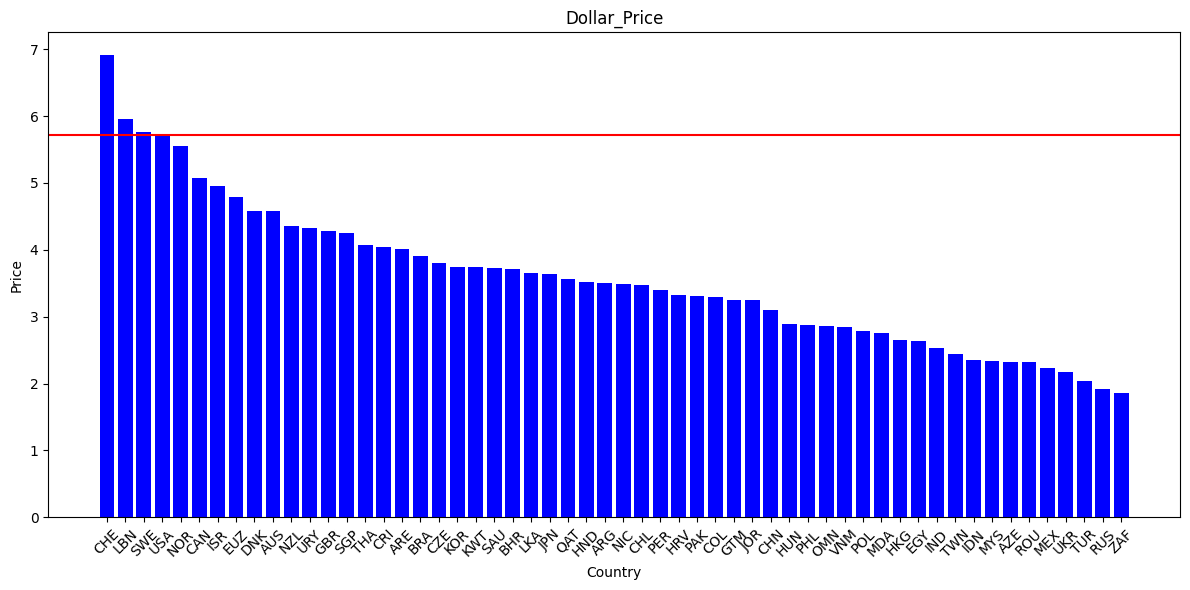

In [4]:
#Q1 b
bigmac['date'] = pd.to_datetime(bigmac['date'])
recent_data = bigmac[bigmac['date'] == '2020-07-01']

recent_data = recent_data.sort_values(by='dollar_price', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(recent_data['iso_a3'], recent_data['dollar_price'], color='blue',width = 0.8)

#Horizontal reference line for the USA price
dollar_price_usa = recent_data[recent_data['iso_a3'] == 'USA']['dollar_price'].values[0]
plt.axhline(y=dollar_price_usa, color='red', linestyle='-')

#Labeling the plot
plt.title('Dollar_Price')
plt.xlabel('Country')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='center')

plt.tight_layout()
plt.show()

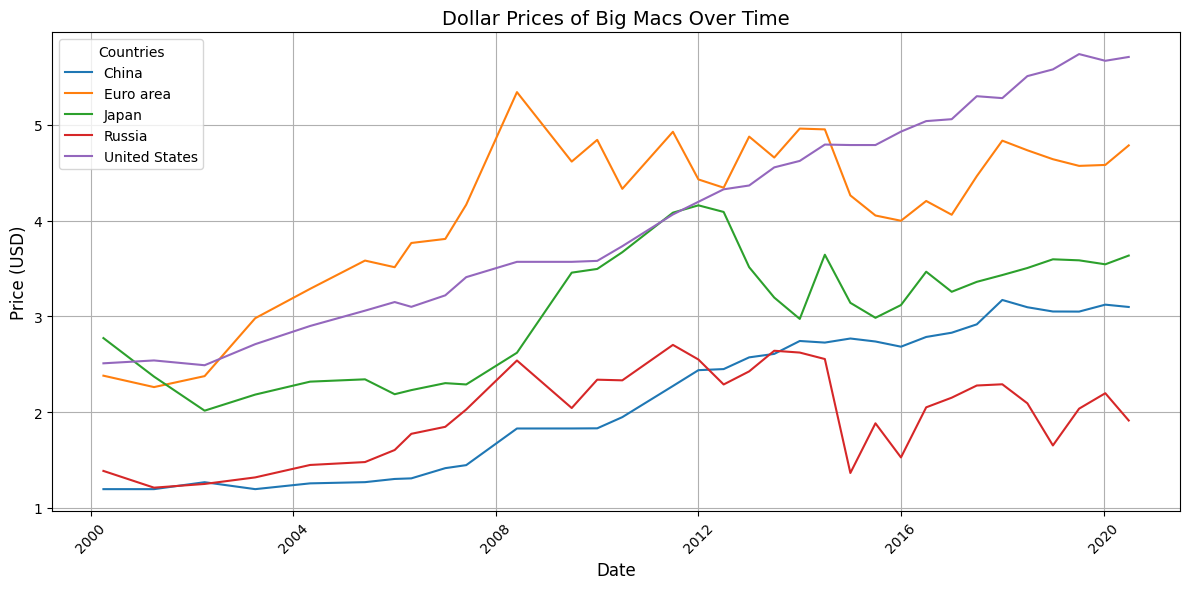

In [5]:
#Q1 c
Selected_countries = ['United States', 'Euro area', 'Russia', 'China', 'Japan']
Countries = bigmac[bigmac['name'].isin(Selected_countries)]

#line plot
pivot_data = Countries.pivot(index='date', columns='name', values='dollar_price')
plt.figure(figsize=(12, 6))

for country in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[country], label=country)

# Step 7: Add labels and title
plt.title('Dollar Prices of Big Macs Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Countries')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

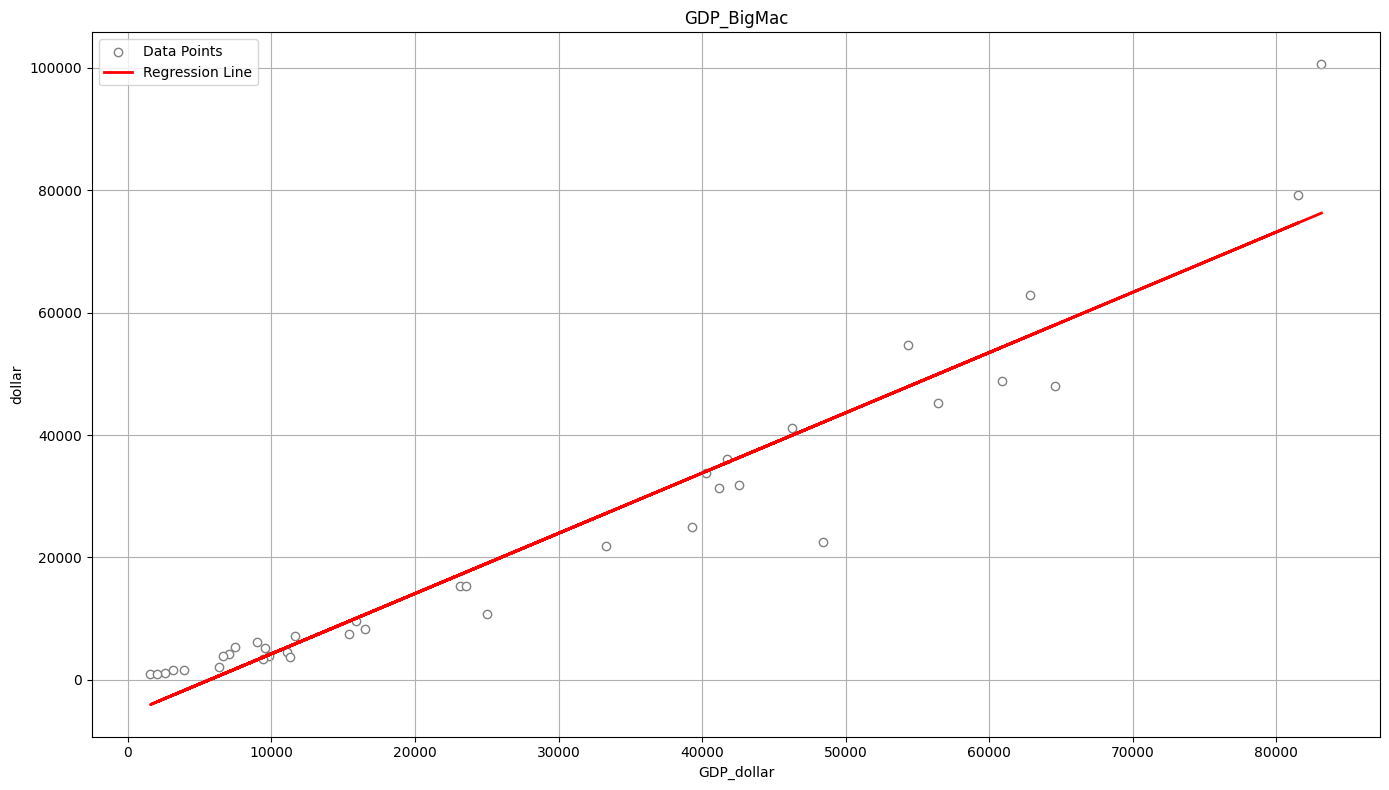

In [6]:
#Q1 d
recent_data['GDPBigMac'] = recent_data['GDP_dollar'] * (recent_data['dollar_price'] / dollar_price_usa)
recent_data = recent_data.dropna(subset=['GDPBigMac', 'GDP_dollar', 'dollar_price'])

#Fit a regression line
X = recent_data[['GDP_dollar']]
Y = recent_data['GDPBigMac']

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
plt.figure(figsize=(14, 8))

#Plot the data point
plt.scatter(X,Y, color='white', edgecolor='grey', label='Data Points')

#Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

#Labeling the plot
plt.title('GDP_BigMac')
plt.xlabel('GDP_dollar')
plt.ylabel('dollar')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

#Q2 Tableau Public - Fifa World Cup

https://public.tableau.com/app/profile/ka.chung.sun/viz/Book1_17332106607810/Dashboard1?publish=yes

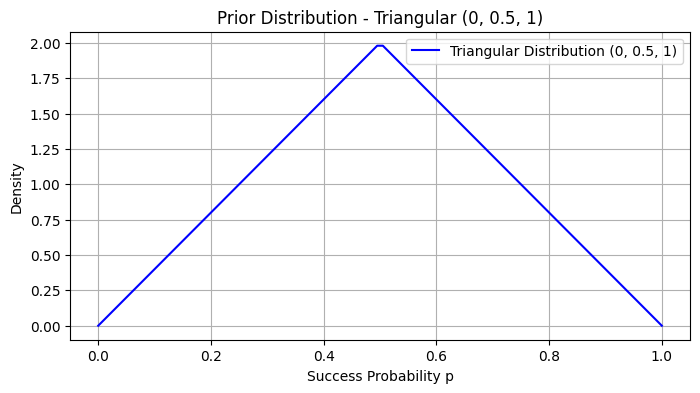

In [1]:
#Q3 a)Medical Application of Bayesian Inference

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang
from scipy.stats import binom

a = 0
b = 1
c = 0.5

x = np.linspace(a, b, 100)
prior_pdf = triang.pdf(x, (c - a) / (b - a), loc=a, scale=b - a)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x, prior_pdf, label=f'Triangular Distribution {a,c,b}', color='blue')
plt.title(f'Prior Distribution - Triangular {a,c,b}')
plt.xlabel('Success Probability p')
plt.ylabel('Density')
plt.grid()
plt.legend()
plt.show()


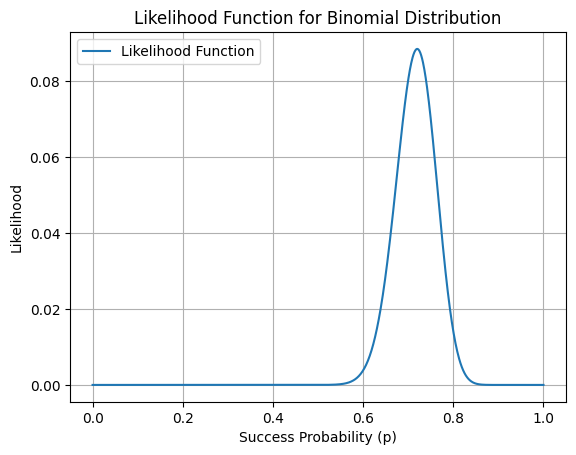

In [2]:
# Define the data
successes = 72
trials = 100

# Define the range of p values from 0 to 1
p_values = np.linspace(0, 1, 1000)

# Compute the likelihood for each value of p
likelihoods = binom.pmf(successes, trials, p_values)

# Plot the likelihood function
plt.plot(p_values, likelihoods, label='Likelihood Function')
plt.title('Likelihood Function for Binomial Distribution')
plt.xlabel('Success Probability (p)')
plt.ylabel('Likelihood')
plt.legend()
plt.grid()
plt.show()


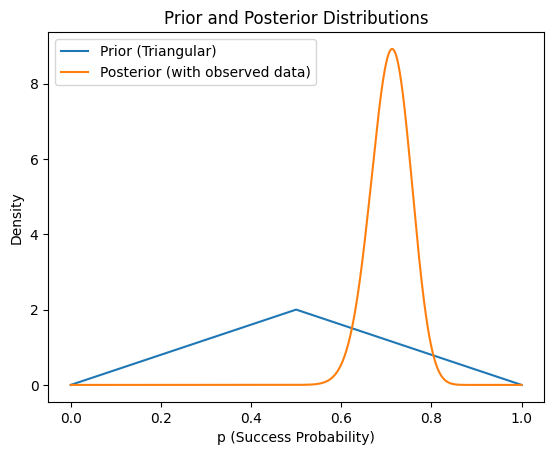

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang, binom
import scipy.integrate as integrate

# Step 1: Define the Prior Distribution using a Triangular Distribution
a = 0.0  # lower limit
c = 0.5  # mode
b = 1.0  # upper limit
prior = triang(c, loc=a, scale=b-a)

# Plot the prior distribution
x = np.linspace(a, b, 1000)
plt.plot(x, prior.pdf(x), label='Prior (Triangular)')
plt.title('Prior and Posterior Distributions')
plt.xlabel('p (Success Probability)')
plt.ylabel('Density')
plt.legend()

# Step 2: Define the Likelihood using the Binomial Distribution
def likelihood(p, data):
    k, n = data
    return binom.pmf(k, n, p)

# Step 3: Update Prior with Observed Data using Bayesian Inference
def posterior(p, data):
    return likelihood(p, data) * prior.pdf(p)

# Normalize the posterior
def normalized_posterior(data):
    normalization_factor, _ = integrate.quad(lambda p: posterior(p, data), a, b)
    return lambda p: posterior(p, data) / normalization_factor

# Example with observed data
observed_data = (72, 100)  # 72 successes in 100 trials
posterior_pdf = normalized_posterior(observed_data)

# Step 4: Plot the Posterior Distribution
plt.plot(x, [posterior_pdf(p) for p in x], label='Posterior (with observed data)')
plt.legend()
plt.show()


C:\Users\steve\AppData\Local\Temp\ipykernel_7884\3984436980.py:36: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  posterior_cdf_values = cumtrapz(posterior_pdf_values, x, initial=0)


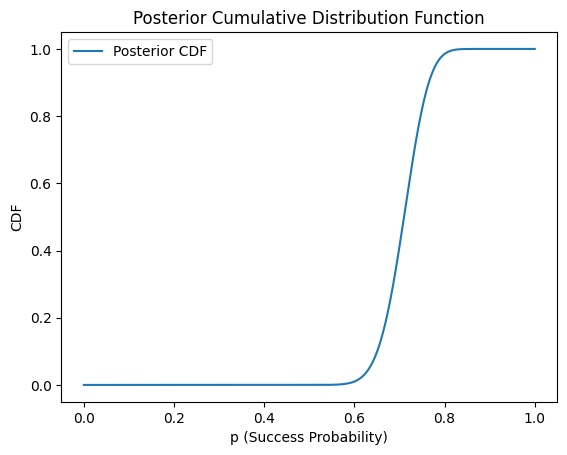

Probability that success rate p is greater than 0.5: 0.999992200943446
95% credible interval for p: (0.6186186186186187, 0.7927927927927928)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang, binom
import scipy.integrate as integrate
from scipy.integrate import cumtrapz

# Step 1: Define the Prior Distribution using a Triangular Distribution
a = 0.0  # lower limit
c = 0.5  # mode
b = 1.0  # upper limit
prior = triang(c, loc=a, scale=b-a)

# Step 2: Define the Likelihood using the Binomial Distribution
def likelihood(p, data):
    k, n = data
    return binom.pmf(k, n, p)

# Step 3: Update Prior with Observed Data using Bayesian Inference
def posterior(p, data):
    return likelihood(p, data) * prior.pdf(p)

# Normalize the posterior
def normalized_posterior(data):
    normalization_factor, _ = integrate.quad(lambda p: posterior(p, data), a, b)
    return lambda p: posterior(p, data) / normalization_factor

# Observed data
observed_data = (72, 100)  # 72 successes in 100 trials
posterior_pdf = normalized_posterior(observed_data)

# Compute posterior PDF values
x = np.linspace(a, b, 1000)
posterior_pdf_values = np.array([posterior_pdf(p) for p in x])

# Step 4: Compute the CDF of the posterior
posterior_cdf_values = cumtrapz(posterior_pdf_values, x, initial=0)

# Plot the CDF
plt.plot(x, posterior_cdf_values, label='Posterior CDF')
plt.title('Posterior Cumulative Distribution Function')
plt.xlabel('p (Success Probability)')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Step 5: Calculate the probability that p > 0.5
prob_p_greater_0_5 = 1 - posterior_cdf_values[np.searchsorted(x, 0.5)]
print(f"Probability that success rate p is greater than 0.5: {prob_p_greater_0_5}")

# Step 6: Calculate the 95% credible interval for p
credible_interval_lower = x[np.searchsorted(posterior_cdf_values, 0.025)]
credible_interval_upper = x[np.searchsorted(posterior_cdf_values, 0.975)]
print(f"95% credible interval for p: ({credible_interval_lower}, {credible_interval_upper})")


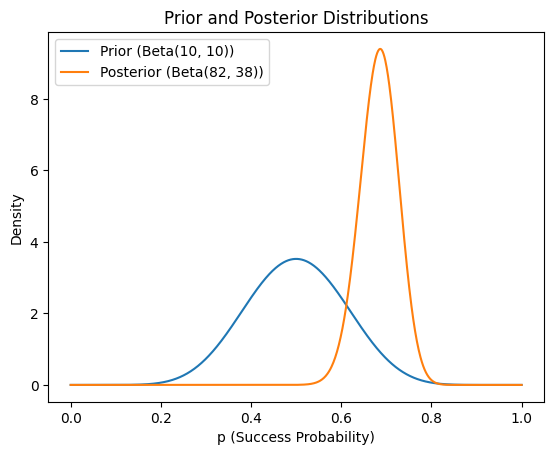

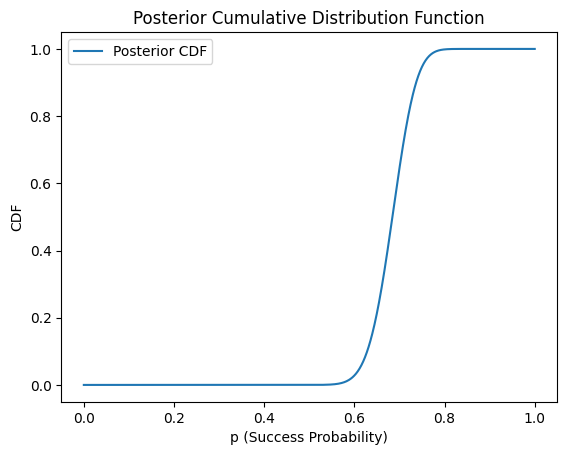

Probability that success rate p is greater than 0.5: 0.9999773743263827
95% credible interval for p: (0.5977397399475133, 0.7631385009108951)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the Prior Distribution (Beta)
alpha_prior = 10
beta_prior = 10

# Observed data
successes = 72
trials = 100

# Define the Posterior Distribution (Beta)
alpha_posterior = alpha_prior + successes
beta_posterior = beta_prior + (trials - successes)

# Plot the Prior and Posterior Distributions
x = np.linspace(0, 1, 1000)
prior_pdf = beta.pdf(x, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(x, alpha_posterior, beta_posterior)

plt.plot(x, prior_pdf, label='Prior (Beta(10, 10))')
plt.plot(x, posterior_pdf, label='Posterior (Beta(82, 38))')
plt.title('Prior and Posterior Distributions')
plt.xlabel('p (Success Probability)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Compute the CDF of the Posterior
posterior_cdf = beta.cdf(x, alpha_posterior, beta_posterior)

# Plot the CDF of the Posterior
plt.plot(x, posterior_cdf, label='Posterior CDF')
plt.title('Posterior Cumulative Distribution Function')
plt.xlabel('p (Success Probability)')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Calculate the probability that p > 0.5
prob_p_greater_0_5 = 1 - beta.cdf(0.5, alpha_posterior, beta_posterior)
print(f"Probability that success rate p is greater than 0.5: {prob_p_greater_0_5}")

# Calculate the 95% credible interval for p
credible_interval_lower = beta.ppf(0.025, alpha_posterior, beta_posterior)
credible_interval_upper = beta.ppf(0.975, alpha_posterior, beta_posterior)
print(f"95% credible interval for p: ({credible_interval_lower}, {credible_interval_upper})")


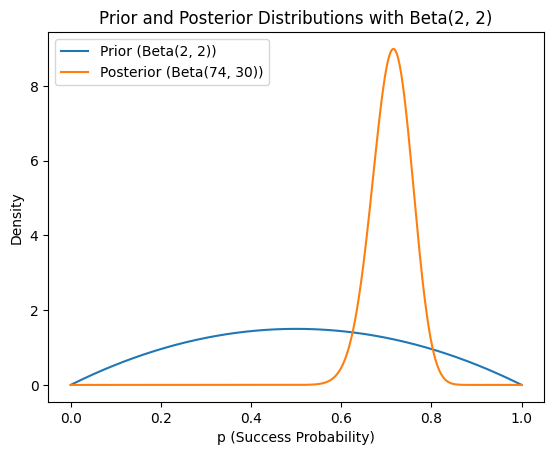

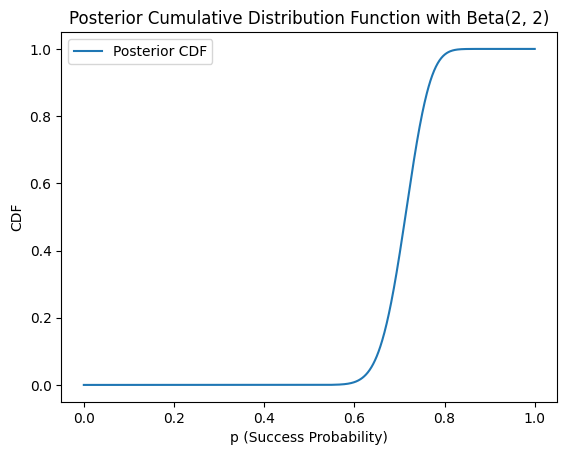

Probability that success rate p is greater than 0.5: 0.9999946473708854
95% credible interval for p: (0.6212718676830291, 0.794100001337307)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# New Prior Distribution (Beta)
alpha_prior_new = 2
beta_prior_new = 2

# Posterior Distribution with new prior
alpha_posterior_new = alpha_prior_new + successes
beta_posterior_new = beta_prior_new + (trials - successes)

# Plot the New Prior and Posterior Distributions
prior_pdf_new = beta.pdf(x, alpha_prior_new, beta_prior_new)
posterior_pdf_new = beta.pdf(x, alpha_posterior_new, beta_posterior_new)

plt.plot(x, prior_pdf_new, label='Prior (Beta(2, 2))')
plt.plot(x, posterior_pdf_new, label='Posterior (Beta(74, 30))')
plt.title('Prior and Posterior Distributions with Beta(2, 2)')
plt.xlabel('p (Success Probability)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Compute the CDF of the new Posterior
posterior_cdf_new = beta.cdf(x, alpha_posterior_new, beta_posterior_new)

# Plot the CDF of the new Posterior
plt.plot(x, posterior_cdf_new, label='Posterior CDF')
plt.title('Posterior Cumulative Distribution Function with Beta(2, 2)')
plt.xlabel('p (Success Probability)')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Calculate the probability that p > 0.5 with new prior
prob_p_greater_0_5_new = 1 - beta.cdf(0.5, alpha_posterior_new, beta_posterior_new)
print(f"Probability that success rate p is greater than 0.5: {prob_p_greater_0_5_new}")

# Calculate the 95% credible interval for p with new prior
credible_interval_lower_new = beta.ppf(0.025, alpha_posterior_new, beta_posterior_new)
credible_interval_upper_new = beta.ppf(0.975, alpha_posterior_new, beta_posterior_new)
print(f"95% credible interval for p: ({credible_interval_lower_new}, {credible_interval_upper_new})")
